## Discriminator | Convolutional Neural Network

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist

from keras.layers import (
    Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape)


from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D
from tensorflow.keras.utils import plot_model

In [2]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)    

In [26]:
def build_discriminator(img_shape):

    model = Sequential()

    model.add(                                  
        Conv2D(32,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='valid'))

    model.add(LeakyReLU(alpha=0.01))            

    model.add(                                  
        Conv2D(64,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    model.add(                                  
        Conv2D(128,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Flatten())                        
    model.add(Dense(1, activation='sigmoid'))


    return model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 8, 8, 32)          832       
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 8, 8, 32)          0         
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 batch_normalization_20 (Bat  (None, 4, 4, 64)         256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 4, 4, 64)          0         
                                                                 
 conv2d_32 (Conv2D)          (None, 2, 2, 128)         73856     
                                                     

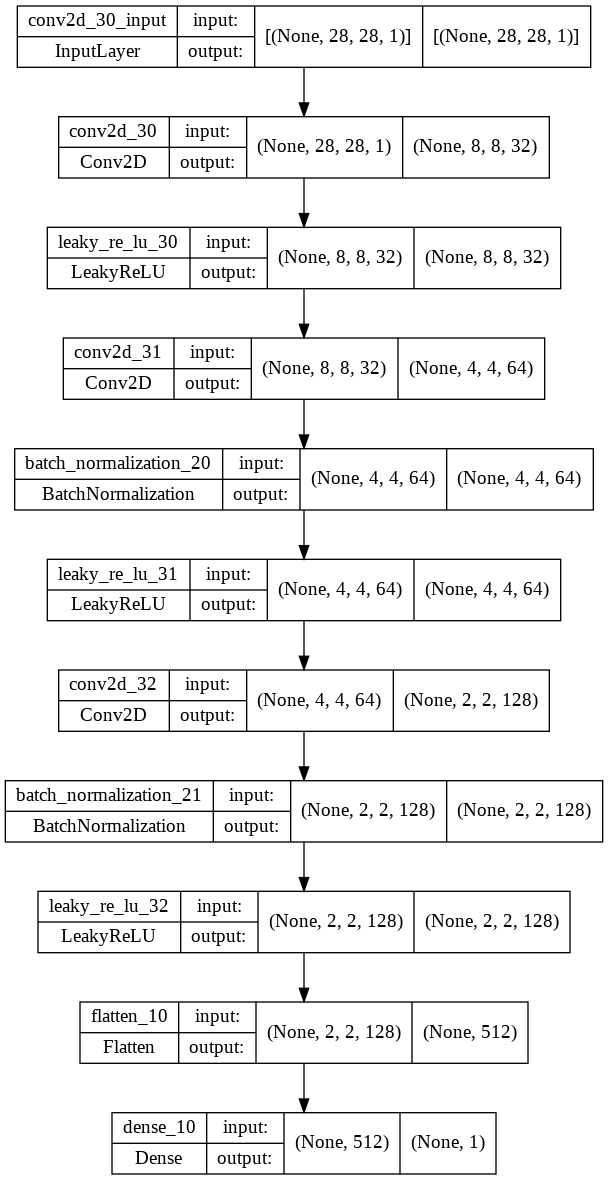

In [25]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
discriminator.summary()
plot_model(discriminator, to_file='model.png', show_shapes=True)


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def show_img(img, figsize=(2,2)):
    fig = plt.figure(figsize=figsize,dpi=100)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

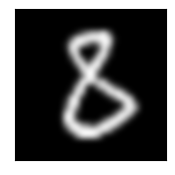

In [ ]:
show_img(X_train[602])

In [ ]:
for i in range(28):
  for j in range(28):
    s = str(X_train[602][i][j])
    s_ljust = s.rjust(4,'_')
    print(s_ljust, end="")
  
  print("")


___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0___0___0__30__98_159_194_194_255_112___0___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0___0__91_237_253_253_253_253_254_235__29___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0__31_221_248_212_128__56_128_254_220__13___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0__25_241_203___0___0___0__60_254_122___0___0___0___0___0___0___0___0___0___0
___0___0___0___0___0___0___0___0___0___0_147_237__14___0___6_193_254__69___0___0___0___0___0___0

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()

    char = 1 #True image
    X_train_1 = X_train[np.where(y_train==char)]    

    char = 7 #Fake image
    X_train_7 = X_train[np.where(y_train==char)]  

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train_1 = X_train_1 / 127.5 - 1.0
    X_train_7 = X_train_7 / 127.5 - 1.0
   # X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train_1.shape[0], batch_size)
        imgs = X_train_1[idx]

        # Get a random batch of fake images
        idx = np.random.randint(0, X_train_7.shape[0], batch_size)
        fake_img = X_train_7[idx]

        # Generate a batch of fake images　(random noize of [-1 1])
        #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
        #fake_img = np.zeros((batch_size, 28, 28)) -1.0
        #print(fake_img.shape)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(fake_img , fake)
       # print(d_loss_real, d_loss_fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)


        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            #print("%d [D loss: %f] " %
            #      (iteration + 1, d_loss))
            print("%d [D loss: %f, acc.: %.2f%%] " %
                  (iteration + 1, d_loss, 100.0 * accuracy))

            # Output a sample of generated image
 

In [ ]:
discriminator.metrics_names

['loss', 'accuracy']

In [ ]:
# Set hyperparameters
iterations = 10
batch_size = 256
sample_interval = 1

# Train the Discriminator for the specified number of iterations
train(iterations, batch_size, sample_interval)

1 [D loss: 2.153763, acc.: 22.07%] 
2 [D loss: 0.325676, acc.: 85.94%] 
3 [D loss: 0.053491, acc.: 98.83%] 
4 [D loss: 0.087138, acc.: 98.44%] 
5 [D loss: 0.101498, acc.: 98.05%] 
6 [D loss: 0.108567, acc.: 97.46%] 
7 [D loss: 0.054474, acc.: 99.02%] 
8 [D loss: 0.042653, acc.: 98.83%] 
9 [D loss: 0.035358, acc.: 98.83%] 
10 [D loss: 0.025338, acc.: 99.22%] 


0 

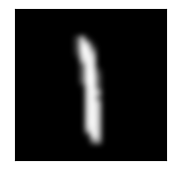

1 

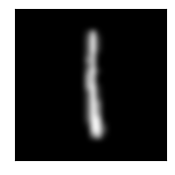

2 

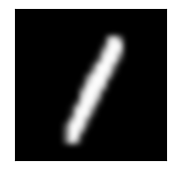

3 

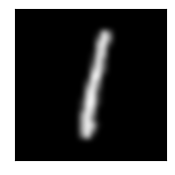

4 

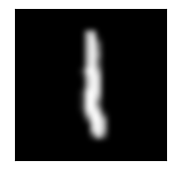

5 

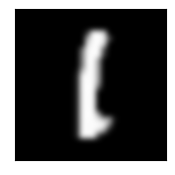

6 

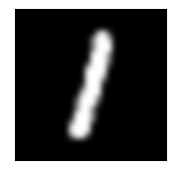

7 

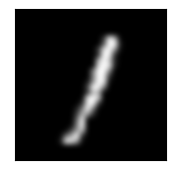

8 

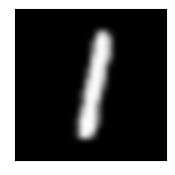

9 

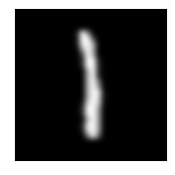

10 

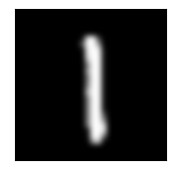

11 

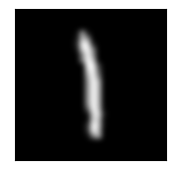

12 

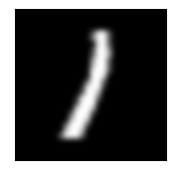

13 

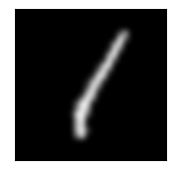

14 

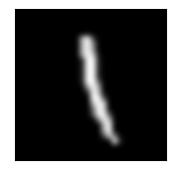

15 

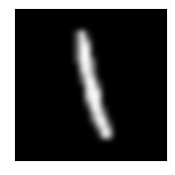

16 

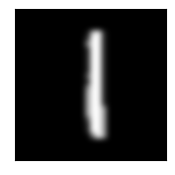

17 

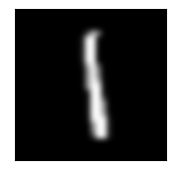

18 

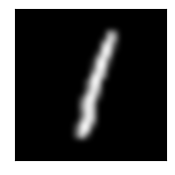

19 

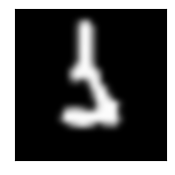

[[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999964]]
(array([], dtype=int64), array([], dtype=int64))
0 

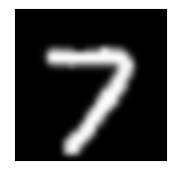

1 

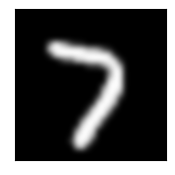

2 

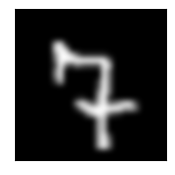

3 

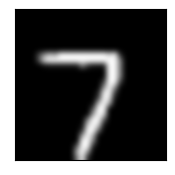

4 

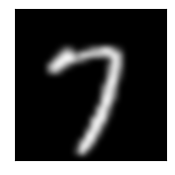

5 

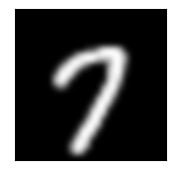

6 

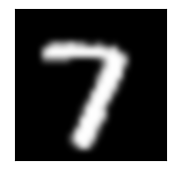

7 

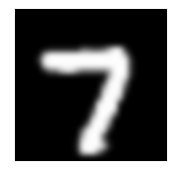

8 

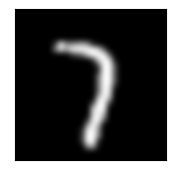

9 

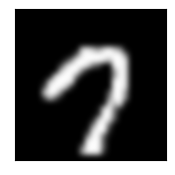

10 

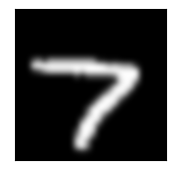

11 

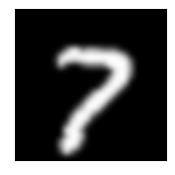

12 

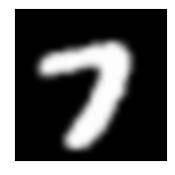

13 

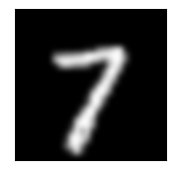

14 

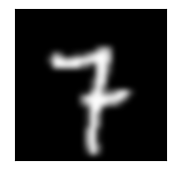

15 

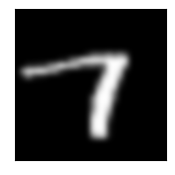

16 

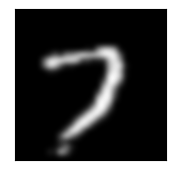

17 

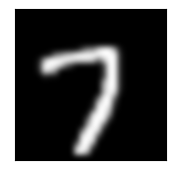

18 

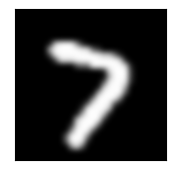

19 

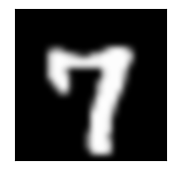

[[5.4946970e-33]
 [4.8282443e-28]
 [1.9376327e-18]
 [4.8200091e-32]
 [2.3335690e-26]
 [2.8305272e-29]
 [2.4108006e-23]
 [3.5863726e-38]
 [2.5335721e-15]
 [5.6518630e-26]
 [1.0797701e-22]
 [2.8235126e-25]
 [3.7917763e-33]
 [2.1961655e-22]
 [1.0833981e-12]
 [2.6599378e-21]
 [4.4236953e-25]
 [8.0642667e-33]
 [3.0036572e-30]
 [2.8449810e-35]]
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#fake_img = np.zeros((batch_size, 28, 28)) -1
 #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
(X_train, _), (X_test, _) = mnist.load_data()
char = 1 #True image
X_test_1 = X_test[np.where(y_test==char)]    

char = 7 #Fake image
X_test_7 = X_test[np.where(y_test==char)]  

test_size = 20

#### test 1: real image
idx = np.random.randint(0, X_test_1.shape[0], test_size)
imgs_1 = X_test_1[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_1[i])

y = discriminator.predict(imgs_1)
print(y)

false = np.where(y<=0.5)
print(false)


#### test 7: fake image
idx = np.random.randint(0, X_test_7.shape[0], test_size)
imgs_7 = X_test_7[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_7[i])

y = discriminator.predict(imgs_7)
print(y)
false = np.where(y>=0.5)
print(false)

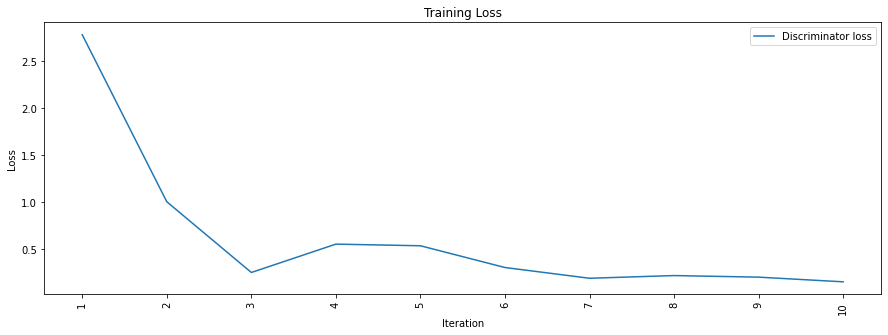

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")


plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()